# Intalação dos pacotes

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("font", size=14)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import pairwise_distances

In [2]:
def print_cluster_info(c, number):
    grupo = pd.DataFrame({'topic':dfc_sc.columns, 'value': centers[c]}).sort_values(by='value')
    fig, ax = plt.subplots(figsize=(7,10))
    grupo.plot(kind='barh', x='topic', y='value', legend = False, ax=ax, color='red')
    ax.set_xlabel('Relevância para o grupo')
    ax.set_ylabel('Tópicos')
    ax.set_title('Tópicos relevantes para o grupo '+str(c)+' que possui '+str(number[c])+" elementos")

In [3]:
def cluster_quality(df, centers, cluster):
    temp = df[df['label'] == cluster]
    temp = temp.drop(columns=['label'])
    dist = pairwise_distances(temp, centers[cluster].reshape(1, -1))
    return cluster, np.mean(dist), np.std(dist)

# Leitura dos dados e análise descritiva

In [4]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_54f99bbd676b46c1863f92dc98593d22 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_54f99bbd676b46c1863f92dc98593d22.get_object(Bucket='',Key='snsdata.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [5]:
df.shape

(30000, 40)

In [6]:
df.isnull().sum()

gradyear           0
gender          2724
age             5086
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

In [7]:
df['gradyear'].value_counts()

2009    7500
2008    7500
2007    7500
2006    7500
Name: gradyear, dtype: int64

Text(0.5, 1.0, 'Quantidade de usuários por sexo')

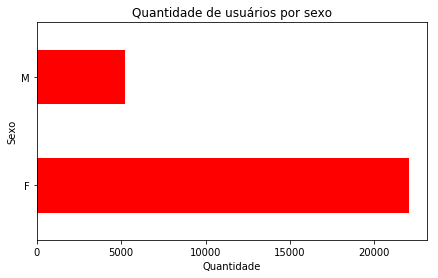

In [8]:
fig, ax = plt.subplots(figsize=(7,4))
df['gender'].value_counts().plot(kind='barh', legend = False, ax=ax, color='red')
ax.set_xlabel('Quantidade')
ax.set_ylabel('Sexo')
ax.set_title('Quantidade de usuários por sexo')

In [9]:
df['gender'].value_counts()

F    22054
M     5222
Name: gender, dtype: int64

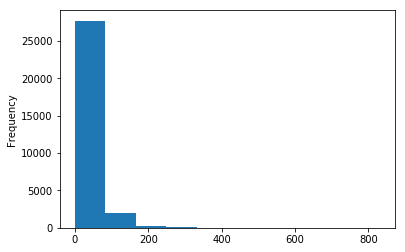

In [10]:
df['friends'].plot(kind='hist')

In [11]:
df['age'].describe()

count    24914.000000
mean        17.993950
std          7.858054
min          3.086000
25%         16.312000
50%         17.287000
75%         18.259000
max        106.927000
Name: age, dtype: float64

O atributo age não é confiável

# Pré-processamento

Vamos clusterizar as pessoas levando-se em consideração apenas o conteúdo produzido

In [12]:
df.columns

Index(['gradyear', 'gender', 'age', 'friends', 'basketball', 'football',
       'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading',
       'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed',
       'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus',
       'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes',
       'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs'],
      dtype='object')

In [13]:
dfc = df[['basketball', 'football','soccer', 'softball', 'volleyball', 'swimming', 'cheerleading',
       'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed',
       'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus',
       'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes',
       'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs']]

In [14]:
dfc.head()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [15]:
dfc.describe()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.267333,0.252300,0.222767,0.161200,0.143133,0.13440,0.106633,0.104933,0.087333,0.139967,...,0.098933,0.257367,0.353000,0.14850,0.069867,0.051167,0.184100,0.114233,0.087967,0.060433
std,0.804708,0.705357,0.917226,0.739707,0.639943,0.51699,0.514333,0.521726,0.516961,0.471080,...,1.942319,0.695758,0.724391,0.47264,0.346779,0.279555,0.624516,0.436796,0.399125,0.345522
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,24.000000,15.000000,27.000000,17.000000,14.000000,31.00000,9.000000,16.000000,15.000000,12.000000,...,327.000000,12.000000,11.000000,8.00000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [16]:
#from sklearn.preprocessing import MinMaxScaler
#min_max_scaler = MinMaxScaler()
#min_max_scaler.fit(dfc)
#dfc_sc = pd.DataFrame(min_max_scaler.transform(dfc))
#dfc_sc.columns = dfc.columns

from sklearn.preprocessing import scale
dfc_sc = pd.DataFrame(scale(dfc))
dfc_sc.columns = dfc.columns

In [17]:
dfc_sc.describe()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,...,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04
mean,2.704052e-14,-2.330839e-16,1.003252e-14,4.090942e-15,1.402178e-14,1.550438e-15,-1.042129e-16,-2.791499e-15,8.804790e-16,-3.902316e-15,...,-9.736022e-16,-2.112029e-14,-1.183242e-14,-1.432802e-14,-3.393087e-14,-1.677602e-14,-3.443779e-15,-3.203401e-16,1.261689e-15,-1.083258e-15
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,...,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,-3.322173e-01,-3.576974e-01,-2.428741e-01,-2.179278e-01,-2.236696e-01,-2.599706e-01,-2.073271e-01,-2.011306e-01,-1.689389e-01,-2.971234e-01,...,-5.093652e-02,-3.699147e-01,-4.873142e-01,-3.141979e-01,-2.014763e-01,-1.830317e-01,-2.947932e-01,-2.615302e-01,-2.204026e-01,-1.749076e-01
25%,-3.322173e-01,-3.576974e-01,-2.428741e-01,-2.179278e-01,-2.236696e-01,-2.599706e-01,-2.073271e-01,-2.011306e-01,-1.689389e-01,-2.971234e-01,...,-5.093652e-02,-3.699147e-01,-4.873142e-01,-3.141979e-01,-2.014763e-01,-1.830317e-01,-2.947932e-01,-2.615302e-01,-2.204026e-01,-1.749076e-01
50%,-3.322173e-01,-3.576974e-01,-2.428741e-01,-2.179278e-01,-2.236696e-01,-2.599706e-01,-2.073271e-01,-2.011306e-01,-1.689389e-01,-2.971234e-01,...,-5.093652e-02,-3.699147e-01,-4.873142e-01,-3.141979e-01,-2.014763e-01,-1.830317e-01,-2.947932e-01,-2.615302e-01,-2.204026e-01,-1.749076e-01
75%,-3.322173e-01,-3.576974e-01,-2.428741e-01,-2.179278e-01,-2.236696e-01,-2.599706e-01,-2.073271e-01,-2.011306e-01,-1.689389e-01,-2.971234e-01,...,-5.093652e-02,-3.699147e-01,8.931794e-01,-3.141979e-01,-2.014763e-01,-1.830317e-01,-2.947932e-01,-2.615302e-01,-2.204026e-01,-1.749076e-01
max,2.949277e+01,2.090850e+01,2.919421e+01,2.276453e+01,2.165366e+01,5.970348e+01,1.729137e+01,3.046682e+01,2.884728e+01,2.517666e+01,...,1.683073e+02,1.687776e+01,1.469812e+01,1.661229e+01,2.575205e+01,2.843431e+01,3.493308e+01,3.179061e+01,1.982379e+01,4.613268e+01


# Modelagem

In [18]:
from sklearn.cluster import KMeans

In [19]:
result = pd.DataFrame(columns=['k','inertia','diff'])
anterior = 0
for k in range(1,15):
    k_means = KMeans(n_clusters=k, n_init=100)
    k_means.fit(dfc_sc)
    result = result.append({'k': k, 'inertia': k_means.inertia_, 'diff': (anterior - k_means.inertia_)}, ignore_index=True)
    anterior = k_means.inertia_

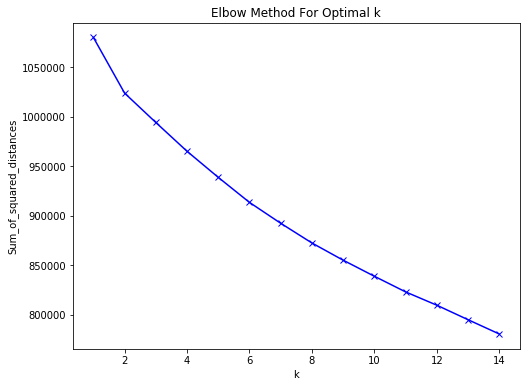

In [20]:
plt.subplots(figsize=(8,6))
plt.plot(result['k'], result['inertia'], 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

**Vamos criar um modelo com 6 segmentos**

In [34]:
k_means = KMeans(n_clusters=6, n_init=100)
k_means.fit(dfc_sc)
centers = k_means.cluster_centers_

In [35]:
import collections
number = collections.Counter(k_means.labels_)
number

Counter({2: 22238, 0: 5331, 4: 1075, 3: 807, 1: 548, 5: 1})

# Resultados

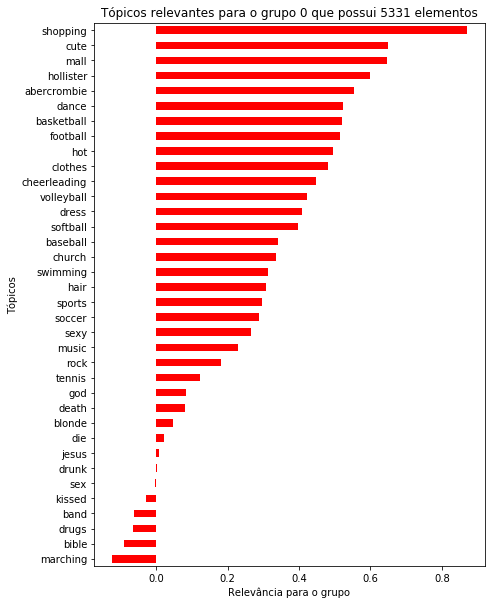

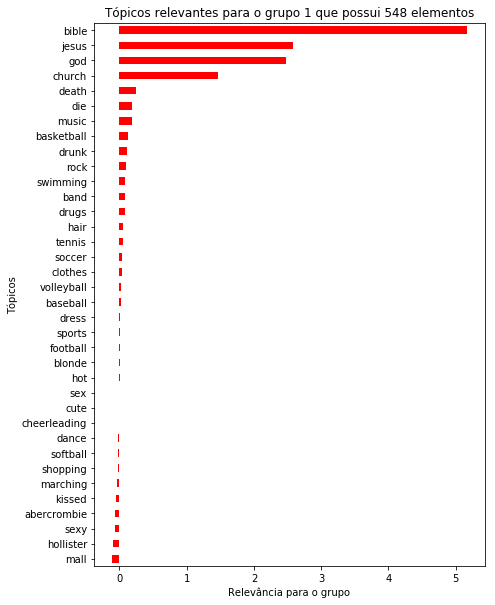

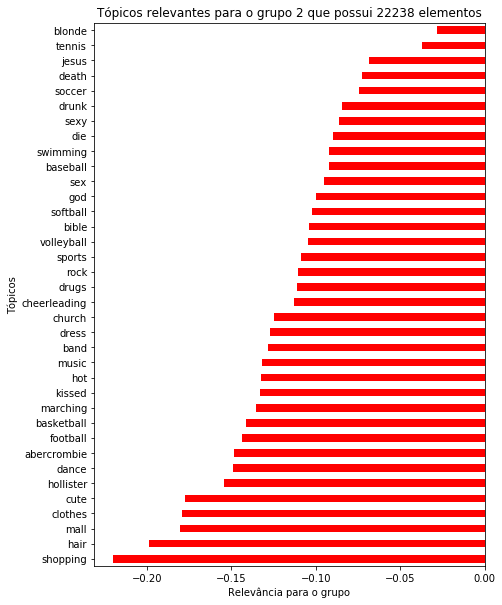

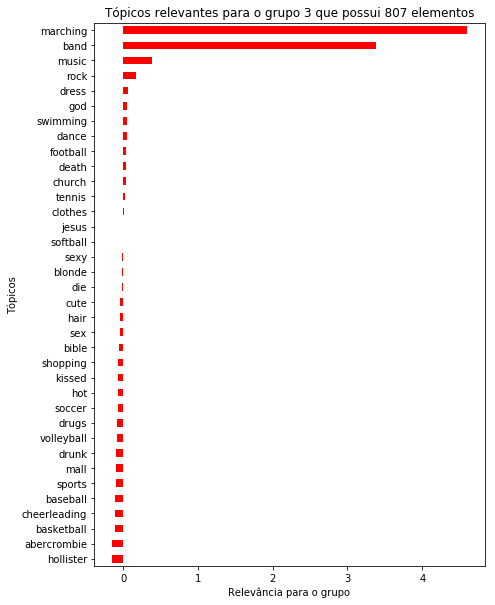

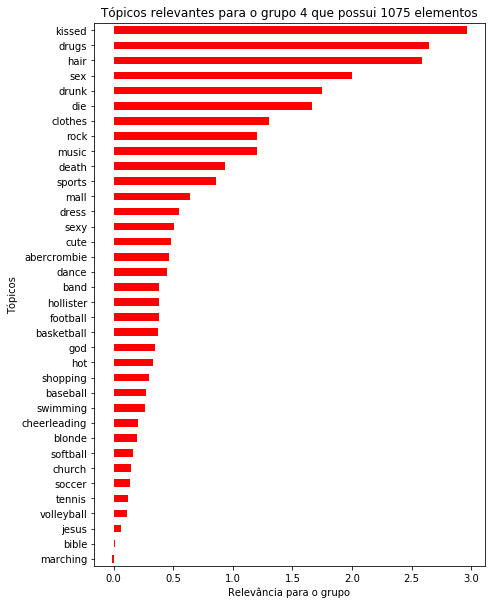

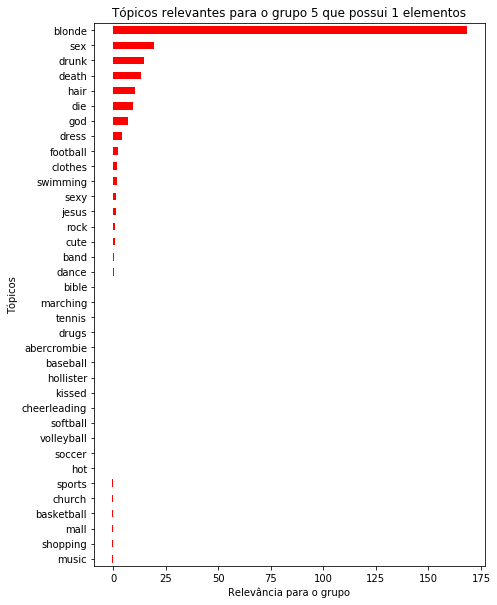

In [36]:
for c in range(0,centers.shape[0]):
    print_cluster_info(c, number)

In [37]:
df_final = df
df_final['label'] = k_means.labels_

In [38]:
df.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,label
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,2006,F,18.801,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,4


In [42]:
df[df['label'] == 5]

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,label
14187,2007,F,18.119,44,0,2,0,0,0,1,...,0,0,1,0,0,6,6,6,0,5


In [44]:
df[df['label'] == 1]['gradyear'].value_counts()

2006    159
2007    142
2008    130
2009    117
Name: gradyear, dtype: int64